Importing Seabor, MatPlotLib, Pandas and NumPy

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Downloading Dataset

In [3]:
lab2_data = sns.load_dataset('titanic')
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Investigating whether the type of booking (first class, second class, third class) on the Titanic may be related to passengers' mean survival rate.

<Axes: xlabel='class', ylabel='survived'>

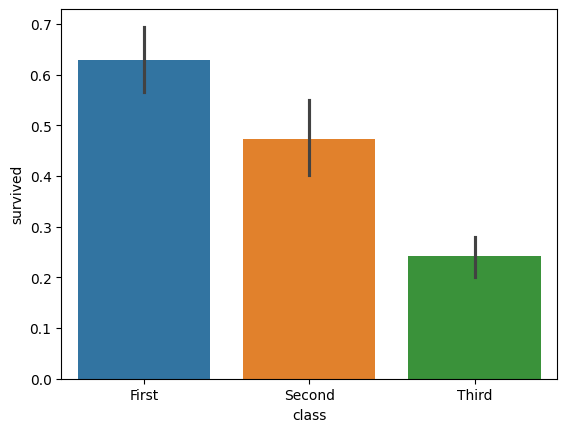

In [4]:
sns.barplot(data=lab2_data, x='class', y='survived', hue="class")

 Investigating whether an individual was a man, woman, or child could be a factor that influenced passengers' survival rates too

<Axes: xlabel='class', ylabel='survived'>

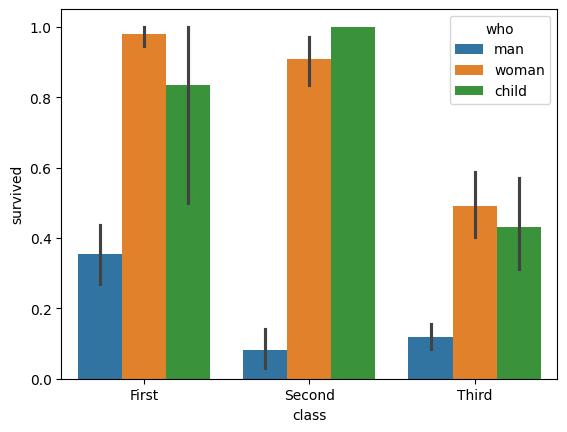

In [7]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who')

There was a significant difference between the survival rates of men vs. women and children regardless of booking. Let's see if this type of difference is also present among children by seperating them into boys and girls.

<Axes: xlabel='class', ylabel='survived'>

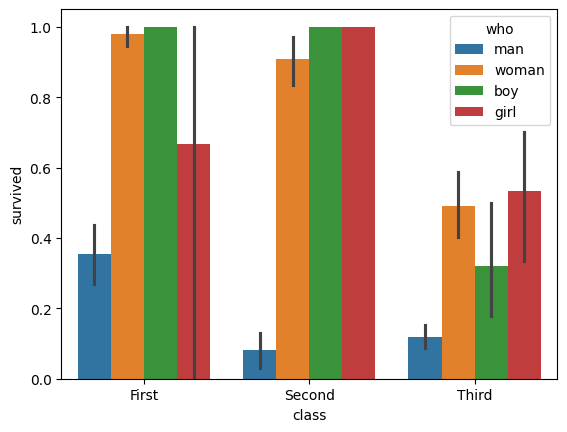

In [8]:
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'male'), 'who'] = 'boy'
lab2_data.loc[(lab2_data['who'] == 'child') & (lab2_data['sex'] == 'female'), 'who'] = 'girl'
sns.barplot(data=lab2_data, x='class', y='survived', hue='who')

 It appears an individual's sex was not a strong predictor of survival among the Titanic's children. Let's adjust the graph to the following arbritrary specifications to practice your Seaborn skills:

1)Error bars should represent 90% confidence intervals

2)The error bars should have whiskers that have a length of 0.05

<ipython-input-9-7b904e5c3bc3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90)


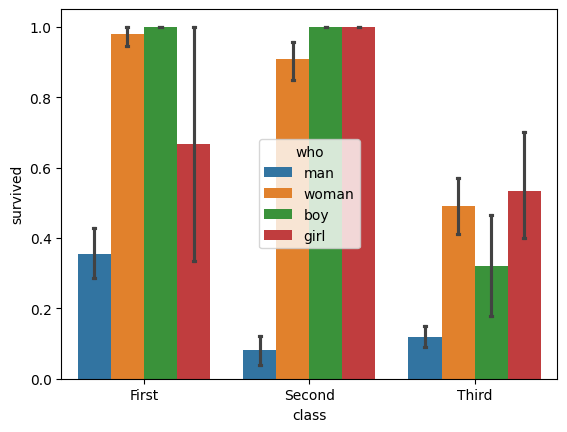

In [9]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90)
plt.legend(loc='center', title='who')

Let's now take a closer look at the passengers themselves by plotting the ages of those who survived and those who didn't. (and some sorting to make it look better)

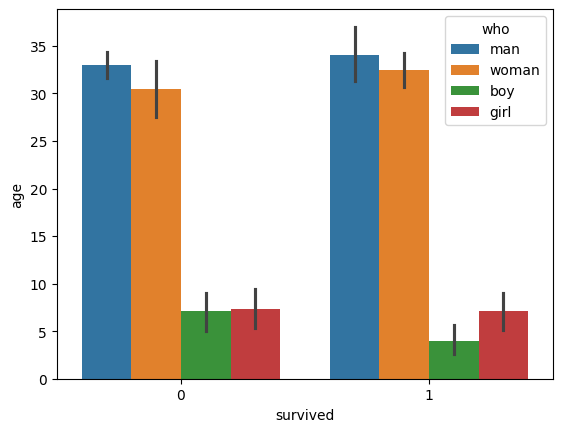

In [10]:
lab2_data_sorted = lab2_data.sort_values(by='age', ascending=False)
sns.barplot(data=lab2_data_sorted, x='survived', y='age', hue='who')
plt.show()

 Renaming the x-axis values of 0 and 1 to 'no' and 'yes' respectively

In [11]:
lab2_data.loc[(lab2_data['survived'] == 0), 'survived_str'] = 'no'
lab2_data.loc[(lab2_data['survived'] == 1),  'survived_str'] = 'yes'
lab2_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


Plot with "yes" and "no"

<Axes: xlabel='survived_str', ylabel='age'>

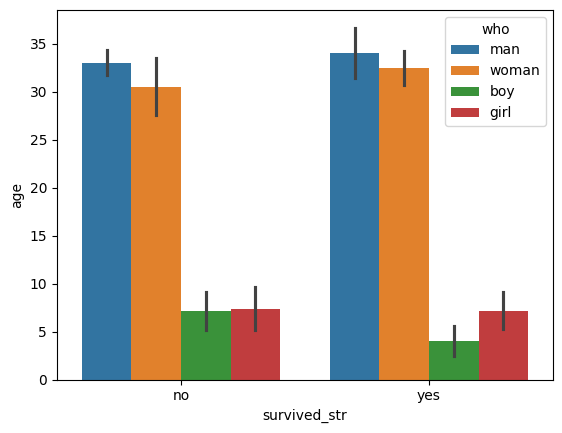

In [12]:
sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who')

Now that we've again obtained a graph we might want to share, let's adjust it to the following arbritrary specifications for practice:

1) Error bars should represent standard deviation

2) The error bars should have whiskers that have a length of 0.05

3) Instead of the sample mean, the bars should represent the sample median

<ipython-input-13-8cb4b48ac7d3>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who', estimator = np.median , ci='sd', capsize=0.05)


<Axes: xlabel='survived_str', ylabel='age'>

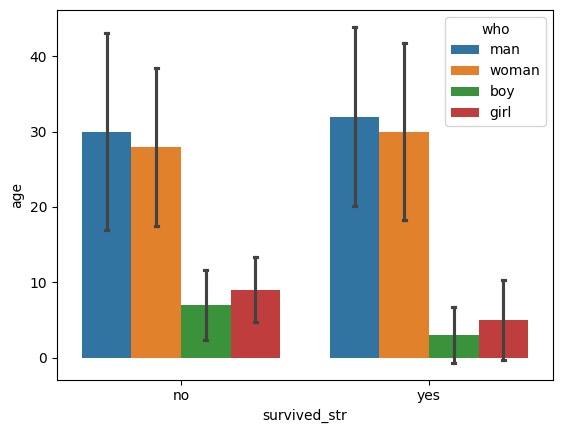

In [13]:
sns.barplot(data=lab2_data, x='survived_str', y='age', hue='who', estimator = np.median , ci='sd', capsize=0.05)

Converting our bar plot into a box plot

<Axes: xlabel='survived_str', ylabel='age'>

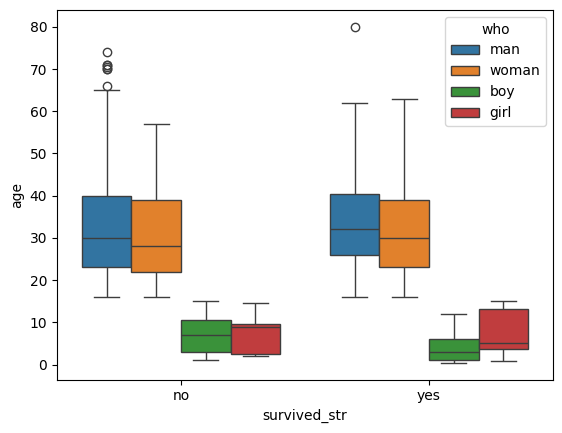

In [14]:
sns.boxplot(data=lab2_data, x='survived_str', y='age', hue='who')

Next, let's produce a strip plot version of this graph with datapoints that are half-transparent and jitter set to 0.3

<Axes: xlabel='survived_str', ylabel='age'>

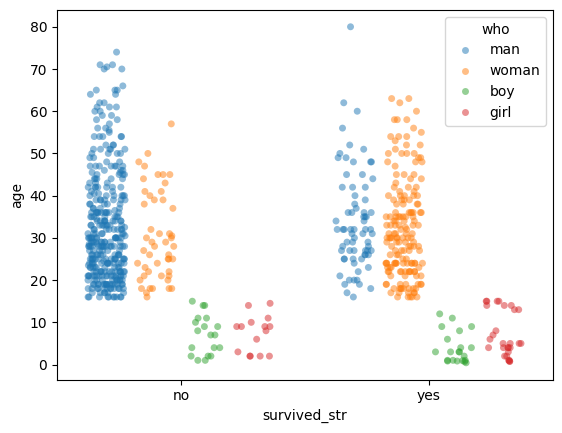

In [ ]:
sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true')

**PART 2 (PLOT #1)**

Setting the style of the plots you will make here to 'white' and the context to 'paper'

In [ ]:
sns.set_style("white")
sns.set_context("paper")

Setting new colors

In [ ]:
colors={'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

<ipython-input-75-df1e30fb3f09>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors)


<Axes: xlabel='class', ylabel='survived'>

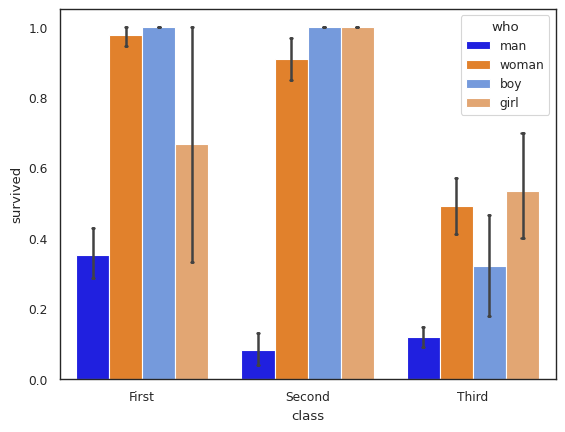

In [ ]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors)

Removing the 'Second' class category for better contrast

<ipython-input-76-5267e1ee12ce>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors, order=['First', 'Third'])


<Axes: xlabel='class', ylabel='survived'>

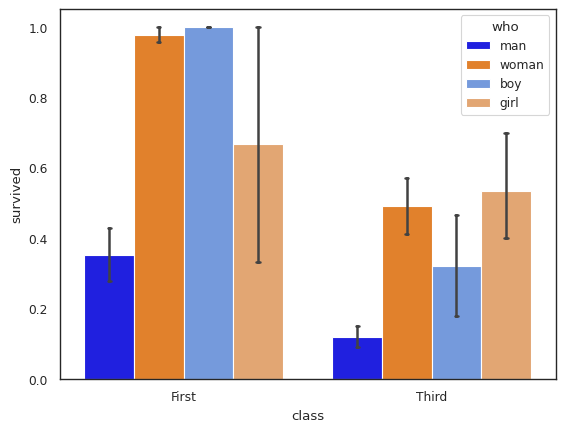

In [ ]:
sns.barplot(data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors, order=['First', 'Third'])

Setting the plot's xlabel to 'Boarding Class' and ylabel to 'Mean survival 'rate'.

<ipython-input-78-9e181b0d1e21>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  axes = sns.barplot(


[Text(0.5, 0, 'Boarding Class'), Text(0, 0.5, 'Mean survival rate')]

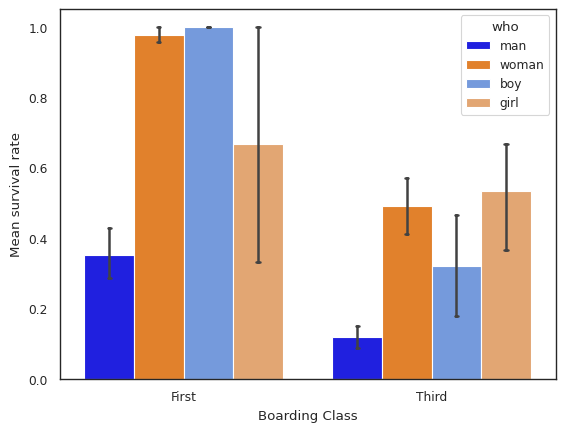

In [ ]:
axes = sns.barplot(
data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors, order=['First', 'Third'])
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')

Despining plot

<ipython-input-84-6219cdcfe4aa>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  axes = sns.barplot(


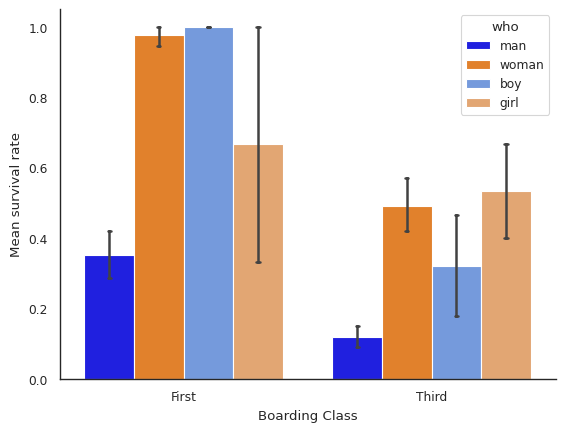

In [ ]:
axes = sns.barplot(
data=lab2_data, x='class', y='survived', hue='who', capsize=0.05, ci=90, palette=colors, order=['First', 'Third'])
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')
sns.despine()

**PART 2 (PLOT #2)**

Creating colorless version of previous boxplot

<Axes: xlabel='survived_str', ylabel='age'>

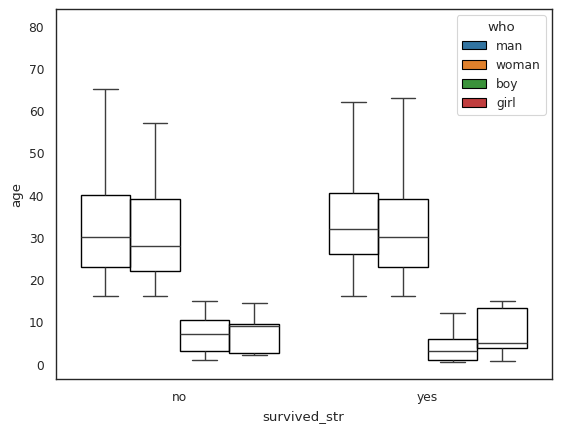

In [ ]:
sns.boxplot(data=lab2_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, flierprops={'marker': 'o', 'markersize': 0, 'linestyle': 'none'})

Coloring Strip Plot using the new color-scheme.

<Axes: xlabel='survived_str', ylabel='age'>

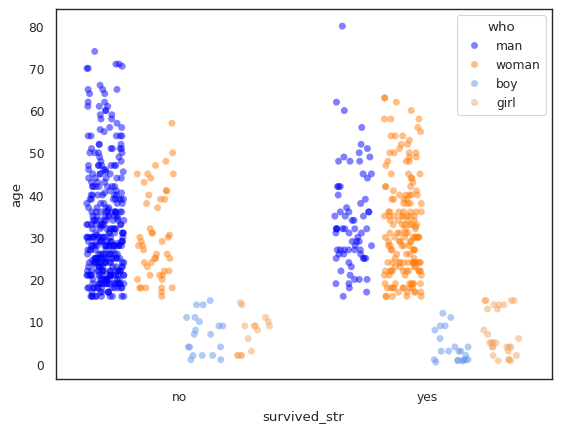

In [ ]:
sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette=colors)

Combining plots

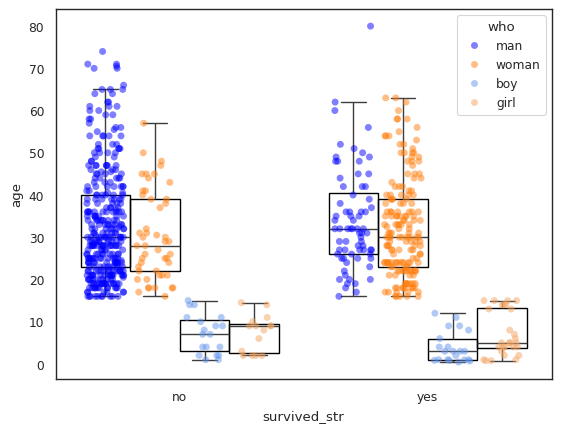

In [ ]:
axes2=sns.boxplot(data=lab2_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, flierprops={'marker': 'o', 'markersize': 0, 'linestyle': 'none'})
axes2=sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette=colors)
handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

Performing the following:

-Pass the zorder=0 argument to sns.stripplot.

-Pass the zorder=5 argument to sns.boxplot.

-Set the xlabel to 'Survived' and ylabel to 'Age'.

-Add the command sns.despine().

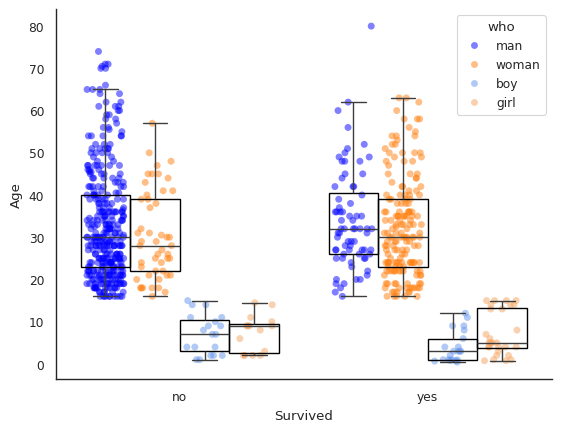

In [ ]:
axes2=sns.boxplot(data=lab2_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)}, flierprops={'marker': 'o', 'markersize': 0, 'linestyle': 'none'}, zorder=5)
axes2=sns.stripplot(data=lab2_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true', palette=colors, zorder=0)
handles, labels = axes2.get_legend_handles_labels()
axes2.set(xlabel='Survived', ylabel='Age')
sns.despine()
plt.legend(handles[4:8], labels[4:8], title='who')

**PART 2 (PLOT #3)**

Creating violinplot on the base of plot#2

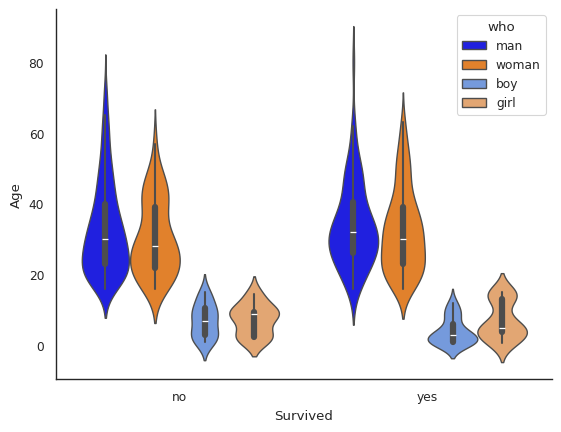

In [ ]:
axes3=sns.violinplot(data=lab2_data, x='survived_str', y='age', hue='who', palette=colors)
axes3.set(xlabel='Survived', ylabel='Age')
sns.despine()

**PART 2 (PLOT #4)**

Creating a scatterplot
The specifications for this graph are as follows:

-Color datapoints by the 'class' of the individual.

-Set the xlabel to 'Age' and ylabel to 'Fare'.

-Despine the plot

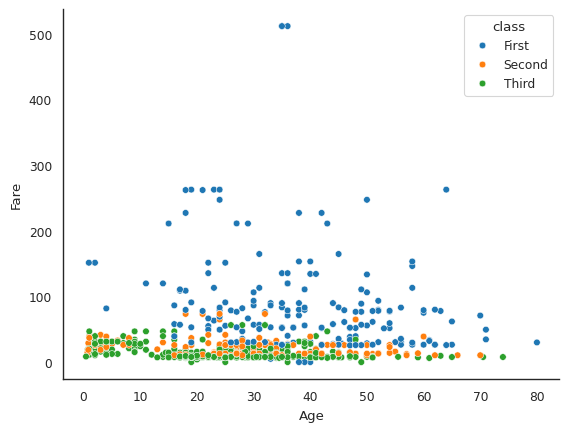

In [ ]:
axes4=sns.scatterplot(data=lab2_data, x='age', y='fare',hue='class')
axes4.set(xlabel='Age', ylabel='Fare')
sns.despine()

**PART 2 (PLOT #5)**

Creating a heatplot

In [ ]:
lab2_data_subset=lab2_data[['class','who','fare']]
lab2_data_subset=lab2_data_subset.dropna(how='any')
lab2_data_subsetAverage=lab2_data_subset.groupby(['class','who']).mean()
lab2_data_subsetAverage=lab2_data_subsetAverage.reset_index()
lab2_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


Converting this categorical data into matrix data

In [ ]:
matrix_data = lab2_data_subsetAverage.pivot(index='class', columns='who',values='fare')
matrix_data.head()

who,boy,girl,man,woman
class,,,,
First,117.802767,160.962500,65.951086,104.317995
Second,27.306022,29.240000,19.054124,20.868624
Third,27.716371,19.023753,11.340213,15.354351


Creating a plot

[Text(0.5, 22.71666666666666, 'Demographic'),
 Text(49.91666666666667, 0.5, 'Boarding Class'),
 [Text(0.5, 0, 'boy'),
  Text(1.5, 0, 'girl'),
  Text(2.5, 0, 'man'),
  Text(3.5, 0, 'woman')]]

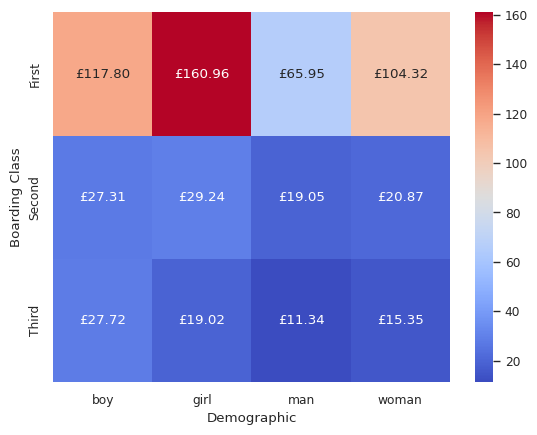

In [ ]:
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])